<a href="https://colab.research.google.com/github/mckennon/Socio-ecnomic-development-trends/blob/main/capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind 
import seaborn as sns
from google.colab import files 
from sympy import *

path ="/content/gdrive/MyDrive/Colab Datasets/soci_econ_country_profiles.csv"
raw = pd.read_csv(path)

raw.describe()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Data Cleaning 

Data Demensions

In [ ]:
raw.shape

(66, 96)

DataFrame Contents 

In [ ]:
raw.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58

Check for missing values

In [ ]:
raw.isnull().sum()

Unnamed: 0                                                     0
country                                                        0
Region                                                         0
Surface area (km2)                                             0
Population in thousands (2017)                                 0
Population density (per km2, 2017)                             0
Sex ratio (m per 100 f, 2017)                                  0
GDP: Gross domestic product (million current US$)              0
GDP growth rate (annual %, const. 2005 prices)                 0
GDP per capita (current US$)                                   0
Economy: Agriculture (% of GVA)                                0
Economy: Industry (% of GVA)                                   0
Economy: Services and other activity (% of GVA)                0
Employment: Agriculture (% of employed)                        0
Employment: Industry (% of employed)                           0
Employment: Services (% o

Missing Values

Adjusted net national income per capita (constant 2010 US$)
Air transport, freight (million ton-km)                        
Air transport, passengers carried 
Commercial service exports (current US$)                       
Commercial service imports (current US$)                       
Consumer price index (2010 = 100)                              
Current account balance (% of GDP)                             
Current health expenditure (% of GDP)                          
Exports of goods and services (% of GDP)                       
Gross domestic savings (% of GDP)                              
High-technology exports (current US$)                          
Human capital index (HCI) (scale 0-1)                          
Imports of goods and services (% of GDP)                       
Inflation, consumer prices (annual %)    
Military expenditure (% of GDP)
Tax revenue (% of GDP)                                         
Taxes on income, profits and capital gains (% of revenue)      
italicized text

In [ ]:
df = raw.fillna(0)
df.isnull().sum()

Unnamed: 0                                                     0
country                                                        0
Region                                                         0
Surface area (km2)                                             0
Population in thousands (2017)                                 0
Population density (per km2, 2017)                             0
Sex ratio (m per 100 f, 2017)                                  0
GDP: Gross domestic product (million current US$)              0
GDP growth rate (annual %, const. 2005 prices)                 0
GDP per capita (current US$)                                   0
Economy: Agriculture (% of GVA)                                0
Economy: Industry (% of GVA)                                   0
Economy: Services and other activity (% of GVA)                0
Employment: Agriculture (% of employed)                        0
Employment: Industry (% of employed)                           0
Employment: Services (% o

Write to CSV file 

In [ ]:
df.to_csv('2017socio_econoomic_country.csv',index=False)

In [ ]:
! ls

2017socio_econoomic_country.csv  gdrive  sample_data


In [ ]:
! cat 2017socio_econoomic_country.csv

Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (

**Read Data**

In [ ]:
df = pd.read_csv('2017socio_econoomic_country.csv')

In [ ]:
df

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58

Overview of data types of each column in the data frame

In [ ]:
df.dtypes

Unnamed: 0                                                       int64
country                                                         object
Region                                                          object
Surface area (km2)                                               int64
Population in thousands (2017)                                   int64
Population density (per km2, 2017)                             float64
Sex ratio (m per 100 f, 2017)                                  float64
GDP: Gross domestic product (million current US$)                int64
GDP growth rate (annual %, const. 2005 prices)                 float64
GDP per capita (current US$)                                   float64
Economy: Agriculture (% of GVA)                                 object
Economy: Industry (% of GVA)                                   float64
Economy: Services and other activity (% of GVA)                float64
Employment: Agriculture (% of employed)                        float64
Employ

Show specific data types in data frame

In [ ]:
df.select_dtypes(include=['number'])

,Unnamed: 0,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Urban population (% of total population)_x,"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,2780400,44271,16.2,95.9,632343,2.4,14564.5,27.8,66.2,2.0,24.8,73.1,6.5,119,119,57733,55610,2124,-15944,91.8,2.3,13.7,4.8,38.9,143.9,69.4,256,10.0,3167,85,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.00,9094.367252,56.046355,305.102000,1.674927e+07,1.527416e+10,2.498242e+10,112.887108,-4.848850,9.124315,11.242721,16.019342,1.494148e+09,0.611,13.980611,0.000000,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,7692060,24451,3.2,99.3,1230859,2.4,51352.2,26.5,71.1,2.7,21.2,76.1,5.5,111,111,189630,189406,224,-57746,89.4,1.9,3.9,9.4,28.7,132.8,84.6,948,16.2,15282,222,-99,176.54,101.94,57.58,74.25,80.66,9.24,34.73,24.58,72.79,4.90,5.05,20.41,19.82,70.87,1.41,80.66,42.54,62.39,76.87,77.12,101.94,100.00,43073.967170,52.599671,1982.586171,7.425733e+07,6.429639e+10,6.739220e+10,115.686785,-2.689997,9.205948,21.193200,24.687193,4.837244e+09,0.803,20.576800,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,83871,8736,106.0,96.2,376967,1.0,44117.7,28.3,70.4,4.7,25.6,69.7,6.2,108,108,145503,149299,-3795,7020,66.0,1.4,3.3,11.2,30.6,157.4,8

In [ ]:
df.select_dtypes(include=['object'])

,country,Region,Economy: Agriculture (% of GVA),Labour force participation (female/male pop. %),Population growth rate (average annual %),Urban population growth rate (average annual %),"Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)"
0,Argentina,SouthAmerica,6.0,48.6/74.4,1.0,1.0,24.9/15.4,2086.3/4.8,5.0,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,204.0/4.7,99.0/100.0,96.2/98.3,0.01
1,Australia,Oceania,2.5,58.4/70.7,1.5,1.5,19.0/21.0,6763.7/28.2,58.2,3.4,5.2,102.1/102.3,133.6/141.3,106.3/75.4,361.3/15.3,100.0/100.0,100.0/100.0,-99
2,Austria,WesternEurope,1.3,54.6/65.8,0.6,0.4,14.1/25.1,1492.4/17.5,166.4,5.2,5.5,102.2/103.7,97.6/102.4,89.2/74.3,58.7/6.9,100.0/100.0,100.0/100.0,-99
3,Belarus,EasternEurope,7.5,54.0/67.8,~0.0,~0.0,16.7/21.3,1082.9/11.4,7.9,4.1,4.9,101.3/101.4,106.4/107.8,100.7/75.9,63.5/6.7,99.9/99.1,94.1/95.2,0.20
4,Belgium,WesternEurope,0.7,48.1/58.9,0.6,0.5,17.1/24.6,1387.9/12.3,63.8,3.0,6.6,104.2/104.2,177.7/156.4,85.4/65.0,93.4/8.3,100.0/100.0,99.5/99.4,-99
5,Bosnia and Herzegovina,SouthernEurope,7.3,34.3/57.5,-1.0,0.1,14.1/23.4,34.8/0.9,157.6,1.9,-99,-99,-99,-99,22.2/5.8,99.7/100.0,98.9/92.0,2.20
6,Brazil,SouthAmerica,5.2,56.0/78.2,0.9,1.2,21.7/12.6,713.6/0.3,41.1,1.9,6.0,113.8/116.8,102.2/97.2,59.3/42.4,529.8/2.6,100.0/87.0,88.0/51.5,0.06
7,Bulgaria,EasternEurope,5.1,48.5/60.1,-0.6,-0.3,14.2/27.7,102.1/1.4,33.7,4.0,4.1,96.7/97.7,97.4/100.5,82.9/65.4,42.4/5.9,99.6/99.0,86.8/83.7,-99
8,Canada,NorthernAmerica,1.8,60.7/69.9,1.0,1.2,16.0/23.5,7835.5/21.8,155.8,2.5,5.3,101.1/100.1,110.0/109.8,.../...,537.2/15.1,100.0/99.0,100.0/99.0,-99
9,Chile,SouthAmerica,3.9,50.7/74.7,0.9,1.1,20.3/16.0,469.4/2.6,3.7,...,4.9,100.0/103.3,101.3/100.0,94.4/83.0,82.6/4.7,99.7/93.3,100.0/90.9,0.02


**Hypothesis**

Countries with high exports are generally more developed. 

Developing countries should make moves to improve public safety to become more developed.



Countries typically use GDP as a measure of success or failure of a country. For this analyis I will use the Human Capital Index as a measure of a countries development. 

In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of pa

In [ ]:
df.rename(columns={'Surface area (km2)':'surface_area',
       'Population in thousands (2017)':'population_thousands', 'Population density (per km2, 2017)':'population_density',
       'Sex ratio (m per 100 f, 2017)':'sex_ratio',
       'GDP: Gross domestic product (million current US$)':'GDP',
       'GDP growth rate (annual %, const. 2005 prices)':'GDP_growth_rate',
       'GDP per capita (current US$)':'GDP_per_capita', 'Economy: Agriculture (% of GVA)':'agriculture_percent_gva',
       'Economy: Industry (% of GVA)':'industry_percent_gva',
       'Economy: Services and other activity (% of GVA)':'service_percent_gva',
       'Employment: Agriculture (% of employed)':'employment_agriculture_percent',
       'Employment: Industry (% of employed)':'employment_industry_perecent',
       'Employment: Services (% of employed)':'employment_services_percent',
       'Unemployment (% of labour force)':'unemployment_percent',
       'Labour force participation (female/male pop. %)':'laborforce_female_male',
       'Agricultural production index (2004-2006=100)':'agriculture_production_index',
       'Food production index (2004-2006=100)':'food_production_index',
       'International trade: Exports (million US$)':'exports',
       'International trade: Imports (million US$)':'imports',
       'International trade: Balance (million US$)':'balence',
       'Balance of payments, current account (million US$)':'balence_of_payments',
       'Population growth rate (average annual %)':'population_growth_rate',
       'Urban population (% of total population)_x':'urban_population_percent',
       'Urban population growth rate (average annual %)':'urban_population_growth_rate',
       'Fertility rate, total (live births per woman)':'fertility_rate',
       'Population age distribution (0-14 / 60+ years, %)':'population_age_distribution',
       'International migrant stock (000/% of total pop.)':'international_migrant_stock',
       'Refugees and others of concern to UNHCR (in thousands)':'refugees',
       'Infant mortality rate (per 1000 live births':'infant_mortality_rate',
       'Health: Total expenditure (% of GDP)':'health_total_expenditure',
       'Health: Physicians (per 1000 pop.)':'health_physicians_per_1000',
       'Education: Government expenditure (% of GDP)':'education_percent_gdp',
       'Education: Primary gross enrol. ratio (f/m per 100 pop.)':'education_primary_gross_enrol',
       'Education: Secondary gross enrol. ratio (f/m per 100 pop.)':'education_secondary_enrol',
       'Education: Tertiary gross enrol. ratio (f/m per 100 pop.)':'education_tertiary_enrol',
       'Seats held by women in national parliaments %':'seats_heald_by_women',
       'Mobile-cellular subscriptions (per 100 inhabitants)':'mobile_cellular_subscriptions_per_100',
       'Mobile-cellular subscriptions (per 100 inhabitants).1':'mobile_cellular_subscriptions_per_100_1',
       'Individuals using the Internet (per 100 inhabitants)':'individuals_use_internet_per_100',
       'Threatened species (number)':'threatened_species', 'Forested area (% of land area)':'forested_area_percent_landarea',
       'CO2 emission estimates (million tons/tons per capita)':'co2_emissions_million_tons_per_capita',
       'Energy production, primary (Petajoules)':'energy_production_petajoules',
       'Energy supply per capita (Gigajoules)':'energy_supply_per_capita',
       'Pop. using improved drinking water (urban/rural, %)':'pop_improved_drinking_water_urban_rural',
       'Pop. using improved sanitation facilities (urban/rural, %)':'pop_using_improved_sanitation_urban_rural',
       'Net Official Development Assist. received (% of GNI)':'development_assist_percent_gni',
       'Quality Of Life Index':'quality_of_life', 'Purchasing Power Index':'purchasing_power_index', 'Safety Index':'safety_index',
       'Health Care Index':'health_care_index', 'Cost of Living':'cost_of_living', 'Property price to income ratio':'property_price_to_income_ratio',
       'Traffic commute time index':'traffic_commute_time_index', 'Pollution index':'pollution_index', 'Climate index':'climate_index',
       'Gross Rental Yield City Center':'gross_rental_yield_city_center', 'Gross Rental Yield Outside Center':'gross_rental_yield_outside_center',
       'Property Price to Rent Ratio City Center':'property_price_to_rent_ratio_city_center',
       'Property Price to Rent Ratio Outside Center':'property_price_to_rent_ratio_outside_center',
       'Mortgate as percentage of income':'mortgate_as_percent_income', 'Affordability Index':'afforability_index',
       'Cost Of Living Index':'cost_of_living_index', 'Rent Index':'rent_index', 'Cost Of Living Plus Rent Index':'cost_of_living_plus_rent_index',
       'Grocery Index':'grocery_index', 'Restaurant Price Index':'restaurant_price_index',
       'Local Purchasing Power Index':'local_purchasing_power_index',
       'Access to electricity (% of population)':'access_to_electricity',
       'Adjusted net national income per capita (constant 2010 US$)':'adjusting_net_national_income_per_capita',
       'Age dependency ratio (% of working-age population)':'age_dependency_ratio',
       'Air transport, freight (million ton-km)':'air_transport_freight_million_tonkm',
       'Air transport, passengers carried':'air_transport_passenger_carried',
       'Commercial service exports (current US$)':'commercial_service_exports',
       'Commercial service imports (current US$)':'commercial_service_imports',
       'Consumer price index (2010 = 100)':'consumer_price_index',
       'Current account balance (% of GDP)':'current_account_balence',
       'Current health expenditure (% of GDP)':'current_health_expenditure',
       'Exports of goods and services (% of GDP)':'exports_goods_services',
       'Gross domestic savings (% of GDP)':'gross_domestic_savings_percent_of_gdp',
       'High-technology exports (current US$)':'high_tech_exports',
       'Human capital index (HCI) (scale 0-1)':'human_capital_index',
       'Imports of goods and services (% of GDP)':'imports_of_goods_and_services',
       'Inflation, consumer prices (annual %)':'inflation_consumer_prices_percent',
       'Life expectancy at birth, female (years)':'female_life_expectancy',
       'Life expectancy at birth, male (years)':'male_life_expectancy',
       'Life expectancy at birth, total (years)':'life_expectancy',
       'Military expenditure (% of GDP)':'military_percent_gdp', 'Population, female':'female_population',
       'Population, male':'male_population', 'Tax revenue (% of GDP)':'tax_revenue_percent_gdp',
       'Taxes on income, profits and capital gains (% of revenue)':'taxes_on_income_percent_revenue',
       'Urban population (% of total population)_y':'urban_population_percent_pop'},inplace=True)

**What country has the highest Human Capital Index HCI?**

In [ ]:
highest_HCI = df[df.human_capital_index==df.human_capital_index.max()]
highest_HCI[['country','human_capital_index']]


,country,human_capital_index
49,Singapore,0.884


What country has the lowest HCI?

In [ ]:
lowest_HCI = df[df.human_capital_index==df.human_capital_index.min()]
lowest_HCI[['country','human_capital_index']]

,country,human_capital_index
3,Belarus,0.0
64,Venezuela (Bolivarian Republic of),0.0


Looks like I don't have data for Venezula and Belarus. There going to effect the bias test, so I'm going to delete the rows. 

In [ ]:
df.drop([3,64],axis=0, inplace=True)

Lets try this again

In [ ]:
lowest_HCI = df[df.human_capital_index==df.human_capital_index.min()]
lowest_HCI[['country','human_capital_index']]

,country,human_capital_index
39,Pakistan,0.389


HCI Ranking (highest to lowest)

In [ ]:
HCI_list = df.sort_values('human_capital_index', ascending=False)
HCI_list[['country','human_capital_index']]


,country,human_capital_index
49,Singapore,0.884
44,Republic of Korea,0.845
30,Japan,0.844
10,"China, Hong Kong SAR",0.822
19,Finland,0.814
27,Ireland,0.806
1,Australia,0.803
55,Sweden,0.800
36,Netherlands,0.800
8,Canada,0.799


In [ ]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [ ]:
series_statistics(df['human_capital_index'])

statistics for column: human_capital_index
The max value in the column: 0.884
The min value in the column: 0.389
The mode value in the column: 0    0.747
1    0.767
2    0.800
dtype: float64
The median value in the column: 0.7175
The mean of the column: 0.68846875
The std of the column: 0.11286513496415175


In [ ]:
df['human_capital_index'].describe()

count    64.000000
mean      0.688469
std       0.112865
min       0.389000
25%       0.606250
50%       0.717500
75%       0.774500
max       0.884000
Name: human_capital_index, dtype: float64

What is the Variance of the dataset?

In [ ]:
hci_var = df.var()['human_capital_index']
hci_var

0.01273853869047619

Analysing export columns

In [ ]:
export_list = df.sort_values('employment_services_percent',ascending=False)
export_list[['country', 'exports','employment_services_percent','safety_index']]

,country,exports,employment_services_percent,safety_index
10,"China, Hong Kong SAR",516588,84.9,79.32
49,Singapore,329871,82.6,83.42
36,Netherlands,511714,81.9,70.11
63,United States of America,1453167,81.3,51.24
28,Israel,60571,81.0,70.99
62,United Kingdom,415856,80.4,58.81
31,Jordan,7509,80.2,56.86
55,Sweden,139574,79.9,53.35
14,Cyprus,1920,79.2,67.54
8,Canada,388911,78.4,60.75


In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'surface_area',
       'population_thousands', 'population_density', 'sex_ratio', 'GDP',
       'GDP_growth_rate', 'GDP_per_capita', 'agriculture_percent_gva',
       'industry_percent_gva', 'service_percent_gva',
       'employment_agriculture_percent', 'employment_industry_perecent',
       'employment_services_percent', 'unemployment_percent',
       'laborforce_female_male', 'agriculture_production_index',
       'food_production_index', 'exports', 'imports', 'balence',
       'balence_of_payments', 'population_growth_rate',
       'urban_population_percent', 'urban_population_growth_rate',
       'fertility_rate', 'population_age_distribution',
       'international_migrant_stock', 'refugees', 'infant_mortality_rate',
       'health_total_expenditure', 'health_physicians_per_1000',
       'education_percent_gdp', 'education_primary_gross_enrol',
       'education_secondary_enrol', 'education_tertiary_enrol',
       'seats_heald_by_women', 

In [ ]:
df[['human_capital_index']].describe()

,human_capital_index
count,64.000000
mean,0.688469
std,0.112865
min,0.389000
25%,0.606250
50%,0.717500
75%,0.774500
max,0.884000


Let's seperate the HCI in half for future T Tests. 

In [ ]:
lower_hci = df[df.human_capital_index < np.percentile(df.human_capital_index,50)]
upper_hci = df[df.human_capital_index > np.percentile(df.human_capital_index, 50)]


In [ ]:
corr = df[['country', 'Region', 'human_capital_index','surface_area',
       'population_thousands', 'population_density', 'sex_ratio', 'GDP',
       'GDP_growth_rate', 'GDP_per_capita', 'agriculture_percent_gva',
       'industry_percent_gva', 'service_percent_gva',
       'employment_agriculture_percent', 'employment_industry_perecent',
       'employment_services_percent', 'unemployment_percent',
       'laborforce_female_male', 'agriculture_production_index',
       'food_production_index', 'exports', 'imports', 'balence',
       'balence_of_payments', 'population_growth_rate',
       'urban_population_percent', 'urban_population_growth_rate',
       'fertility_rate', 'population_age_distribution',
       'international_migrant_stock', 'refugees', 'infant_mortality_rate',
       'health_total_expenditure', 'health_physicians_per_1000',
       'education_percent_gdp', 'education_primary_gross_enrol',
       'education_secondary_enrol', 'education_tertiary_enrol',
       'seats_heald_by_women', 'mobile_cellular_subscriptions_per_100',
       'mobile_cellular_subscriptions_per_100_1',
       'individuals_use_internet_per_100', 'threatened_species',
       'forested_area_percent_landarea',
       'co2_emissions_million_tons_per_capita', 'energy_production_petajoules',
       'energy_supply_per_capita', 'pop_improved_drinking_water_urban_rural',
       'pop_using_improved_sanitation_urban_rural',
       'development_assist_percent_gni', 'quality_of_life',
       'purchasing_power_index', 'safety_index', 'health_care_index',
       'cost_of_living', 'property_price_to_income_ratio',
       'traffic_commute_time_index', 'pollution_index', 'climate_index',
       'gross_rental_yield_city_center', 'gross_rental_yield_outside_center',
       'property_price_to_rent_ratio_city_center',
       'property_price_to_rent_ratio_outside_center',
       'mortgate_as_percent_income', 'afforability_index',
       'cost_of_living_index', 'rent_index', 'cost_of_living_plus_rent_index',
       'grocery_index', 'restaurant_price_index',
       'local_purchasing_power_index', 'access_to_electricity',
       'adjusting_net_national_income_per_capita', 'age_dependency_ratio',
       'air_transport_freight_million_tonkm',
       'air_transport_passenger_carried', 'commercial_service_exports',
       'commercial_service_imports', 'consumer_price_index',
       'current_account_balence', 'current_health_expenditure',
       'exports_goods_services', 'gross_domestic_savings_percent_of_gdp',
       'high_tech_exports',
       'imports_of_goods_and_services', 'inflation_consumer_prices_percent',
       'female_life_expectancy', 'male_life_expectancy', 'life_expectancy',
       'military_percent_gdp', 'female_population', 'male_population',
       'tax_revenue_percent_gdp', 'taxes_on_income_percent_revenue',
       'urban_population_percent_pop']].corr()
corr.sort_values('human_capital_index',ascending = False)

,human_capital_index,surface_area,population_thousands,population_density,sex_ratio,GDP,GDP_growth_rate,GDP_per_capita,industry_percent_gva,service_percent_gva,employment_agriculture_percent,employment_industry_perecent,employment_services_percent,unemployment_percent,agriculture_production_index,food_production_index,exports,imports,balence,balence_of_payments,urban_population_percent,fertility_rate,infant_mortality_rate,health_total_expenditure,seats_heald_by_women,mobile_cellular_subscriptions_per_100,mobile_cellular_subscriptions_per_100_1,individuals_use_internet_per_100,threatened_species,co2_emissions_million_tons_per_capita,energy_production_petajoules,development_assist_percent_gni,quality_of_life,purchasing_power_index,safety_index,health_care_index,cost_of_living,property_price_to_income_ratio,traffic_commute_time_index,pollution_index,climate_index,gross_rental_yield_city_center,gross_rental_yield_outside_center,property_price_to_rent_ratio_city_center,property_price_to_rent_ratio_outside_center,mortgate_as_percent_income,afforability_index,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,access_to_electricity,adjusting_net_national_income_per_capita,age_dependency_ratio,air_transport_freight_million_tonkm,air_transport_passenger_carried,commercial_service_exports,commercial_service_imports,consumer_price_index,current_account_balence,current_health_expenditure,exports_goods_services,gross_domestic_savings_percent_of_gdp,high_tech_exports,imports_of_goods_and_services,inflation_consumer_prices_percent,female_life_expectancy,male_life_expectancy,life_expectancy,military_percent_gdp,female_population,male_population,tax_revenue_percent_gdp,taxes_on_income_percent_revenue,urban_population_percent_pop
human_capital_index,1.000000,-0.018149,-0.278390,0.261376,-0.144409,0.127872,-0.055841,0.648008,-0.233193,0.507020,-0.658010,-0.162628,0.648405,-0.283822,-0.465575,-0.476503,0.264813,0.248599,0.030011,0.132841,0.474164,-0.606810,-0.796630,-0.031115,0.080905,0.199031,0.783335,-0.313551,0.156106,-0.050345,0.286504,NaN,0.583982,0.537886,0.560410,0.394121,0.667957,-0.044117,-0.469700,-0.743017,0.089567,-0.304657,-0.254349,0.355942,0.270712,-0.345605,0.267545,0.667957,0.478482,0.627276,0.620121,0.586710,0.537886,0.550107,0.668816,0.025715,0.191427,0.081205,0.326581,0.343892,-0.423394,0.492016,0.443881,0.416899,0.333756,0.228923,0.333277,-0.396112,0.887032,0.788095,0.852838,-0.210856,-0.280430,-0.283245,0.340818,0.184239,0.457058
female_life_expectancy,0.887032,-0.136633,-0.343189,0.241786,-0.067308,0.046572,-0.056235,0.648600,-0.282956,0.564547,-0.632875,-0.144382,0.617542,-0.212629,-0.509403,-0.520440,0.177823,0.162257,0.033118,0.130051,0.518018,-0.616484,-0.843546,-0.100721,-0.034484,0.140680,0.764760,-0.298743,0.105343,-0.180677,0.275768,NaN,0.543069,0.468374,0.543337,0.458811,0.710287,-0.001029,-0.432811,-0.632881,0.154283,-0.345125,-0.319255,0.368060,0.319405,-0.314473,0.192977,0.710287,0.504193,0.664919,0.663983,0.618640,0.468374,0.629955,0.636997,-0.010672,0.120980,-0.009188,0.243999,0.245427,-0.462453,0.372140,0.411869,0.331084,0.241172,0.169247,0.273135,-0.396836,1.000000,0.913692,0.976107,-0.234423,-0.346292,-0.347384,0.335351,0.174412,0.505009
life_expectancy,0.852838,-0.165773,-0.303374,0.243594,0.005290,0.058359,0.010582,0.715580,-0.272764,0.552896,-0.634253,-0.176225,0.633991,-0.212074,-0.530494,-0.537162,0.190583,0.177079,0.026684,0.122240,0.550367,-0.541777,-0.788167,-0.088854,-0.019383,0.097636,0.768459,-0.298111,0.049651,-0.170664,0.314040,NaN,0.576076,0.545214,0.549275,0.474921,0.764911,-0.069926,-0.426923,-0.612245,0.177731,-0.315364,-0.285408,0.353725,0.296938,-0.381413,0.251095,0.764911,0.559724,0.723720,0.713268,0.685132,0.545214,0.581505,0.699071,-0.017309,0.138066,0.008392,0.267804,0.270690,-0.453771,0.347097,0.423856,0.302200,0.266883,0.170907,0.241631,-0.411954,0.976107,0.979956,1.000000,-0.211876,-0.307477,-0.305647,0.30

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

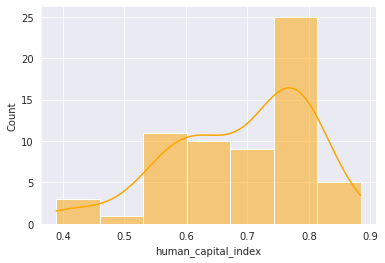

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.human_capital_index,kde=True,color='orange')
plt.savefig('hci_bar.png')
files.download('hci_bar.png')

**Female Life Expectancy**

In [ ]:
stats.pearsonr(df['female_life_expectancy'], df['human_capital_index'])

(0.8870324213236548, 1.757770506870087e-22)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

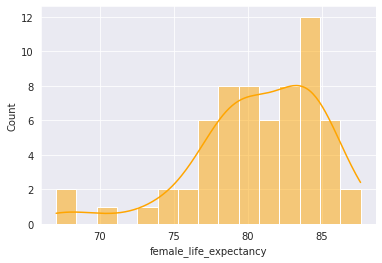

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.female_life_expectancy,kde=True,bins=15, color='orange')
plt.savefig('fle_bar.png')
files.download('fle_bar.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

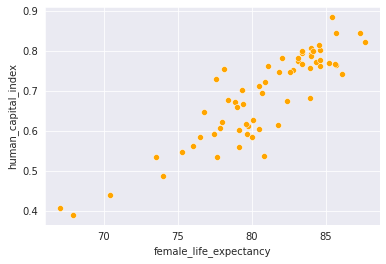

In [ ]:
sns.scatterplot(x="female_life_expectancy", y="human_capital_index", data=df,color='orange')
plt.savefig('fle_hci.png')
files.download('fle_hci.png')

In [ ]:
df['female_life_expectancy'].describe()

count    64.000000
mean     80.775094
std       4.264284
min      67.064000
25%      78.721000
50%      81.000000
75%      84.000000
max      87.600000
Name: female_life_expectancy, dtype: float64

T Test

In [ ]:
stats.ttest_ind(upper_hci['female_life_expectancy'], lower_hci['female_life_expectancy'])

Ttest_indResult(statistic=7.557701572239857, pvalue=2.318752251005839e-10)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['female_life_expectancy'].shape[0]
sample_2_n = upper_hci['female_life_expectancy'].shape[0]
sample_1_mean = lower_hci['female_life_expectancy'].mean()
sample_2_mean = upper_hci['female_life_expectancy'].mean()
sample_1_var = lower_hci['female_life_expectancy'].var()
sample_2_var = upper_hci['female_life_expectancy'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 4.339862085407833 and 7.379012914592107.


**Life Expectancy**



In [ ]:
stats.pearsonr(df['life_expectancy'], df['human_capital_index'])

(0.8528381763034675, 3.7603625121408773e-19)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

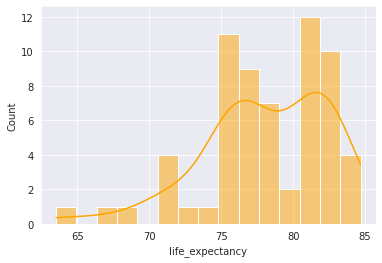

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.life_expectancy,kde=True,bins=15,color='orange')
plt.savefig('le_bar.png')
files.download('le_bar.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

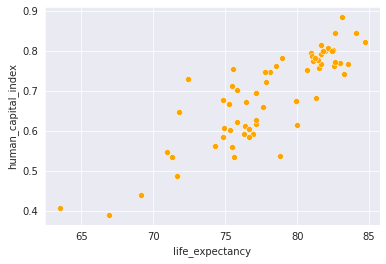

In [ ]:
sns.scatterplot(x="life_expectancy", y="human_capital_index", data=df,color='orange')
plt.savefig('le_hci.png')
files.download('le_hci.png')

In [ ]:
df['life_expectancy'].describe()

count    64.000000
mean     78.067365
std       4.387044
min      63.538000
25%      75.524390
50%      77.959756
75%      81.647561
max      84.680488
Name: life_expectancy, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['life_expectancy'], lower_hci['life_expectancy'])

Ttest_indResult(statistic=7.596114989334883, pvalue=1.9886055255373128e-10)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['life_expectancy'].shape[0]
sample_2_n = upper_hci['life_expectancy'].shape[0]
sample_1_mean = lower_hci['life_expectancy'].mean()
sample_2_mean = upper_hci['life_expectancy'].mean()
sample_1_var = lower_hci['life_expectancy'].var()
sample_2_var = upper_hci['life_expectancy'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 4.484492099677519 and 7.6035216198347.


Male Life Expectancy

In [ ]:
stats.pearsonr(df['male_life_expectancy'], df['human_capital_index'])

(0.7880952196447377, 1.091035871561147e-14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

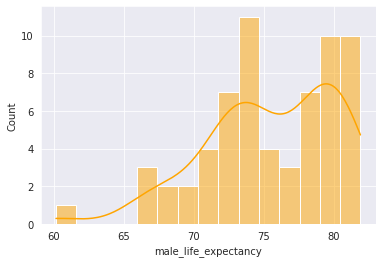

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.male_life_expectancy,kde=True,bins=15,color='orange')
plt.savefig('mle.png')
files.download('mle.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

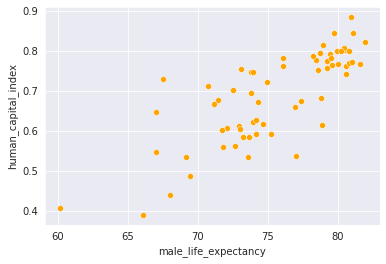

In [ ]:
sns.scatterplot(x="male_life_expectancy", y="human_capital_index", data=df,color='orange')
plt.savefig('mle_hci_scat.png')
files.download('mle_hci_scat.png')

In [ ]:
df['male_life_expectancy'].describe()

count    64.000000
mean     75.488062
std       4.695127
min      60.162000
25%      72.850000
50%      75.658500
75%      79.525000
max      81.900000
Name: male_life_expectancy, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['male_life_expectancy'], lower_hci['male_life_expectancy'])

Ttest_indResult(statistic=7.049350870909674, pvalue=1.766252801012555e-09)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['male_life_expectancy'].shape[0]
sample_2_n = upper_hci['male_life_expectancy'].shape[0]
sample_1_mean = lower_hci['male_life_expectancy'].mean()
sample_2_mean = upper_hci['male_life_expectancy'].mean()
sample_1_var = lower_hci['male_life_expectancy'].var()
sample_2_var = upper_hci['male_life_expectancy'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 4.486486389050839 and 7.942138610949172.


**Mobile celluar subscriptions per 100**

In [ ]:
stats.pearsonr(df['mobile_cellular_subscriptions_per_100_1'], df['human_capital_index'])

(0.7833349905470774, 2.0116044892280112e-14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

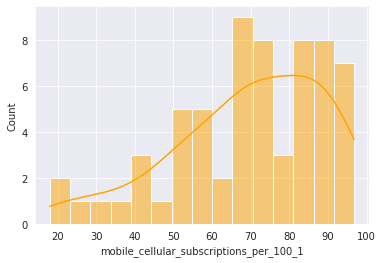

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.mobile_cellular_subscriptions_per_100_1,kde=True,bins=15,color='orange')
plt.savefig('mcs_bar.png')
files.download('mcs_bar.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

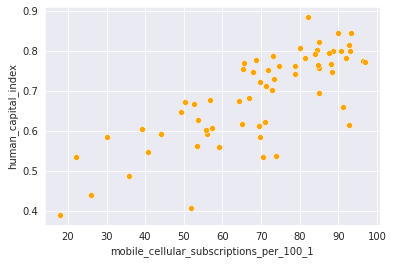

In [ ]:
sns.scatterplot(x="mobile_cellular_subscriptions_per_100_1", y="human_capital_index", data=df,color='orange')
plt.savefig('mcs_hci_scat.png')
files.download('mcs_hci_scat.png')


In [ ]:
df['mobile_cellular_subscriptions_per_100_1'].describe()

count    64.000000
mean     69.625000
std      19.497896
min      18.000000
25%      56.500000
50%      71.550000
75%      85.025000
max      96.800000
Name: mobile_cellular_subscriptions_per_100_1, dtype: float64

TTest


In [ ]:
stats.ttest_ind(upper_hci['mobile_cellular_subscriptions_per_100_1'], lower_hci['mobile_cellular_subscriptions_per_100_1'])

Ttest_indResult(statistic=7.0153771864859085, pvalue=2.0223869783837775e-09)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['mobile_cellular_subscriptions_per_100_1'].shape[0]
sample_2_n = upper_hci['mobile_cellular_subscriptions_per_100_1'].shape[0]
sample_1_mean = lower_hci['mobile_cellular_subscriptions_per_100_1'].mean()
sample_2_mean = upper_hci['mobile_cellular_subscriptions_per_100_1'].mean()
sample_1_var = lower_hci['mobile_cellular_subscriptions_per_100_1'].var()
sample_2_var = upper_hci['mobile_cellular_subscriptions_per_100_1'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 18.54679611351817 and 32.92820388648178.


adjusting_net_national_income_per_capita

In [ ]:
stats.pearsonr(df['adjusting_net_national_income_per_capita'], df['human_capital_index'])

(0.6688159506215579, 1.5398365242355952e-09)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

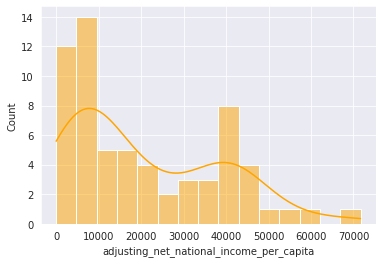

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.adjusting_net_national_income_per_capita,kde=True,bins=15,color='orange')
plt.savefig('anni_bar.png')
files.download('anni_bar.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

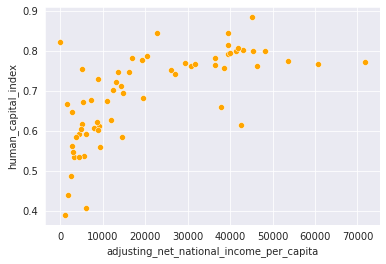

In [ ]:
sns.scatterplot(x="adjusting_net_national_income_per_capita", y="human_capital_index", data=df,color='orange')
plt.savefig('anni_hci_scat.png')
files.download('anni_hci_scat.png')

In [ ]:
df['adjusting_net_national_income_per_capita'].describe()

count       64.000000
mean     21000.603662
std      17718.002098
min          0.000000
25%       5619.526009
50%      14454.502798
75%      38070.273881
max      71668.666787
Name: adjusting_net_national_income_per_capita, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['adjusting_net_national_income_per_capita'], lower_hci['adjusting_net_national_income_per_capita'])

Ttest_indResult(statistic=7.09999967188175, pvalue=1.4432335723769913e-09)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['adjusting_net_national_income_per_capita'].shape[0]
sample_2_n = upper_hci['adjusting_net_national_income_per_capita'].shape[0]
sample_1_mean = lower_hci['adjusting_net_national_income_per_capita'].mean()
sample_2_mean = upper_hci['adjusting_net_national_income_per_capita'].mean()
sample_1_var = lower_hci['adjusting_net_national_income_per_capita'].var()
sample_2_var = upper_hci['adjusting_net_national_income_per_capita'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 17044.554662669078 and 30043.51546867279.


**Cost of living**

In [ ]:
stats.pearsonr(df['cost_of_living'], df['human_capital_index'])

(0.6679566057643549, 1.6441863578583715e-09)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

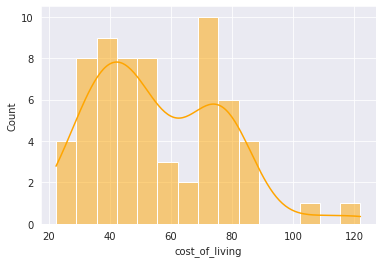

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.cost_of_living,kde=True,bins=15,color='orange')
plt.savefig('col_bar.png')
files.download('col_bar.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

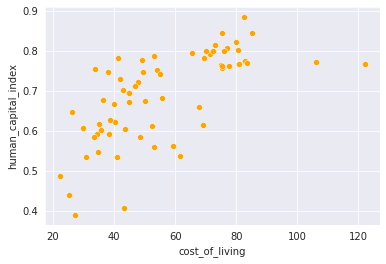

In [ ]:
sns.scatterplot(x="cost_of_living", y="human_capital_index", data=df,color='orange')
plt.savefig('col_hci_scat.png')
files.download('col_hci_scat.png')

In [ ]:
df['cost_of_living'].describe()

count     64.000000
mean      55.873594
std       20.939374
min       22.360000
25%       39.732500
50%       51.330000
75%       73.517500
max      122.060000
Name: cost_of_living, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['cost_of_living'], lower_hci['cost_of_living'])

Ttest_indResult(statistic=6.792513330639384, pvalue=4.909528756612482e-09)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['cost_of_living'].shape[0]
sample_2_n = upper_hci['cost_of_living'].shape[0]
sample_1_mean = lower_hci['cost_of_living'].mean()
sample_2_mean = upper_hci['cost_of_living'].mean()
sample_1_var = lower_hci['cost_of_living'].var()
sample_2_var = upper_hci['cost_of_living'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 19.30889430313755 and 34.97173069686244.


**Percent of employees in service**

In [ ]:
stats.pearsonr(df['employment_services_percent'], df['human_capital_index'])

(0.6484046963008836, 6.911138604498196e-09)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

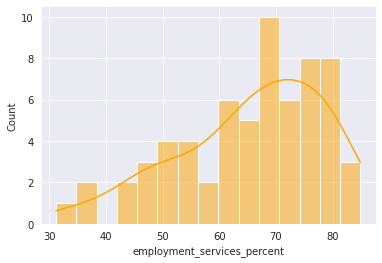

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.employment_services_percent,kde=True,bins=15,color='orange')
plt.savefig('%es_bar.png')
files.download('%es_bar.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

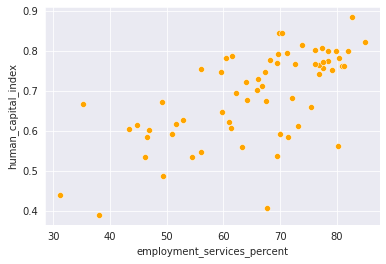

In [ ]:
sns.scatterplot(x="employment_services_percent", y="human_capital_index", data=df,color='orange')
plt.savefig('%es_hci_scat.png')
files.download('%es_hci_scat.png')


In [ ]:
df['employment_services_percent'].describe()

count    64.000000
mean     65.528125
std      12.870570
min      31.200000
25%      58.650000
50%      67.950000
75%      76.275000
max      84.900000
Name: employment_services_percent, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['employment_services_percent'], lower_hci['employment_services_percent'])

Ttest_indResult(statistic=6.0706894527504724, pvalue=8.450885489207904e-08)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['employment_services_percent'].shape[0]
sample_2_n = upper_hci['employment_services_percent'].shape[0]
sample_1_mean = lower_hci['employment_services_percent'].mean()
sample_2_mean = upper_hci['employment_services_percent'].mean()
sample_1_var = lower_hci['employment_services_percent'].var()
sample_2_var = upper_hci['employment_services_percent'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 10.559107685006857 and 20.628392314993114.


**Infant Mortality Rate**

In [ ]:
stats.pearsonr(df['infant_mortality_rate'], df['human_capital_index'])

(-0.7966299925125591, 3.4996363160359934e-15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

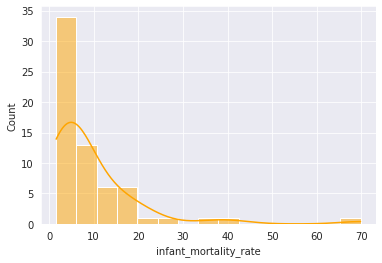

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.infant_mortality_rate,kde=True,bins=15,color='orange')
plt.savefig('imr_bar.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

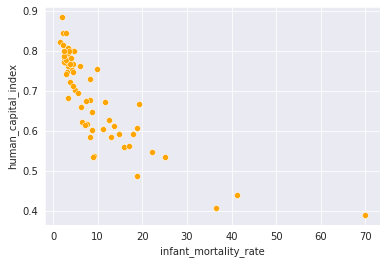

In [ ]:
sns.scatterplot(x="infant_mortality_rate", y="human_capital_index", data=df,color='orange')
plt.savefig('imr_hci_scat.png')


In [ ]:
df['infant_mortality_rate'].describe()

count    64.000000
mean      9.421875
std      10.980495
min       1.600000
25%       3.400000
50%       5.300000
75%      11.300000
max      69.800000
Name: infant_mortality_rate, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['infant_mortality_rate'], lower_hci['infant_mortality_rate'])

Ttest_indResult(statistic=-4.870797467300303, pvalue=8.027062221311567e-06)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['infant_mortality_rate'].shape[0]
sample_2_n = upper_hci['infant_mortality_rate'].shape[0]
sample_1_mean = lower_hci['infant_mortality_rate'].mean()
sample_2_mean = upper_hci['infant_mortality_rate'].mean()
sample_1_var = lower_hci['infant_mortality_rate'].var()
sample_2_var = upper_hci['infant_mortality_rate'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -16.074989053553754 and -6.850010946446243.


**Pollution_index**

In [ ]:
stats.pearsonr(df['pollution_index'], df['human_capital_index'])

(-0.743016514243411, 2.065647508800771e-12)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

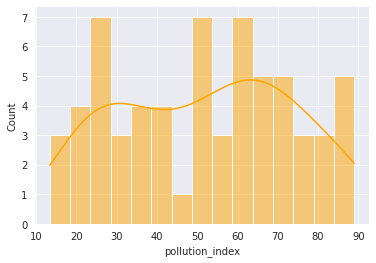

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.pollution_index,kde=True,bins=15,color='orange')
plt.savefig('p_bar.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

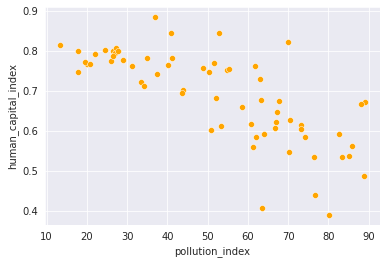

In [ ]:
sns.scatterplot(x="pollution_index", y="human_capital_index", data=df,color='orange')
plt.savefig('p_hci_scat.png')


In [ ]:
df['pollution_index'].describe()

count    64.000000
mean     51.975938
std      21.699616
min      13.380000
25%      32.802500
50%      53.030000
75%      68.227500
max      88.960000
Name: pollution_index, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['pollution_index'], lower_hci['pollution_index'])

Ttest_indResult(statistic=-8.804309699657932, pvalue=1.6111916305720995e-12)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['pollution_index'].shape[0]
sample_2_n = upper_hci['pollution_index'].shape[0]
sample_1_mean = lower_hci['pollution_index'].mean()
sample_2_mean = upper_hci['pollution_index'].mean()
sample_1_var = lower_hci['pollution_index'].var()
sample_2_var = upper_hci['pollution_index'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -39.24069680528238 and -24.95055319471763.


**Percent of employees in agriculture**

In [ ]:
stats.pearsonr(df['employment_agriculture_percent'], df['human_capital_index'])

(-0.658009716441369, 3.4586096738267653e-09)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

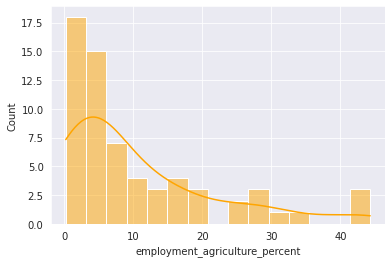

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.employment_agriculture_percent,kde=True,bins=15,color='orange')
plt.savefig('%ea_bar.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

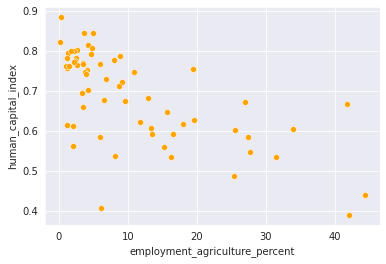

In [ ]:
sns.scatterplot(x="employment_agriculture_percent", y="human_capital_index", data=df,color='orange')
plt.savefig('%ea_hci.png')


In [ ]:
df['employment_agriculture_percent'].describe()

count    64.000000
mean     10.570312
std      11.152588
min       0.200000
25%       2.650000
50%       5.900000
75%      15.325000
max      44.300000
Name: employment_agriculture_percent, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['employment_agriculture_percent'], lower_hci['employment_agriculture_percent'])

Ttest_indResult(statistic=-5.491471751559547, pvalue=7.896483716035977e-07)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['employment_agriculture_percent'].shape[0]
sample_2_n = upper_hci['employment_agriculture_percent'].shape[0]
sample_1_mean = lower_hci['employment_agriculture_percent'].mean()
sample_2_mean = upper_hci['employment_agriculture_percent'].mean()
sample_1_var = lower_hci['employment_agriculture_percent'].var()
sample_2_var = upper_hci['employment_agriculture_percent'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -17.177722015616244 and -8.141027984383754.


**Fertility Rate**

In [ ]:
stats.pearsonr(df['fertility_rate'], df['human_capital_index'])

(-0.6068096544133268, 1.0655051474404075e-07)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

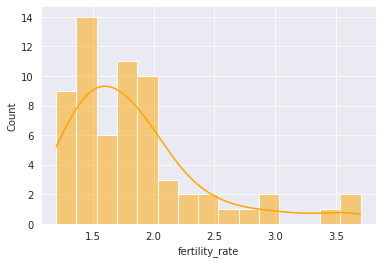

In [ ]:
sns.set_style('darkgrid')
sns.histplot(df.fertility_rate,kde=True,bins=15,color='orange')
plt.savefig('fr_bar.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

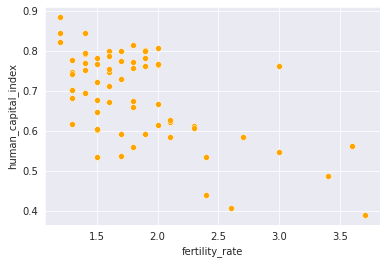

In [ ]:
sns.scatterplot(x="fertility_rate", y="human_capital_index", data=df,color='orange')
plt.savefig('fr_hci_scat.png')


In [ ]:
df['fertility_rate'].describe()

count    64.000000
mean      1.842187
std       0.562253
min       1.200000
25%       1.500000
50%       1.700000
75%       2.000000
max       3.700000
Name: fertility_rate, dtype: float64

TTest

In [ ]:
stats.ttest_ind(upper_hci['fertility_rate'], lower_hci['fertility_rate'])

Ttest_indResult(statistic=-3.051213261303809, pvalue=0.0033524143154967543)

In [ ]:
#Confidence Interval
sample_1_n = lower_hci['fertility_rate'].shape[0]
sample_2_n = upper_hci['fertility_rate'].shape[0]
sample_1_mean = lower_hci['fertility_rate'].mean()
sample_2_mean = upper_hci['fertility_rate'].mean()
sample_1_var = lower_hci['fertility_rate'].var()
sample_2_var = upper_hci['fertility_rate'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -0.6620793674382086 and -0.14417063256179213.


**Findings** 


There can be multiple motivations for analyzing country specific data, ranging from identifying successful approaches in healthcare policy to identifying business investment opportunities, and many more. Often, all these various goals would have to analyze a substantially overlapping set of parameters. Thus, it would be very good to have a broad set of country specific indicators at one place.

The code above shows that there are many factors that effect Human Capital Index. I had two hypothesis at the begining of this exersize. 

1. Countries with high exports are generally more developed.

2. Developing countries should improve safety index to become more developed.

My thought process for the first hypothesis was that countries with high exports indicate that those countries are producing quality materials that the other countries wanted. From the outside oil rich nations like the UAE and Qatar appear to be prosperous modern societies. However, the data shows that this is not the dominant factor in human capital index. In fact it isn't even in the top 10. China and the United States have the highest exports, but are ranked 35 and 24 respectably in terms of human capital index. 

My second hypotheis comes from the idea that safe countries are generally better to do bussiness in. People that feel safe going to work and know that their property rights are respected are more inclined to invest the time and energy it takes to start a business. This hypothesis though significant, is not amoung the most significant factors that improve human capital index. 

I used the corr.sort_values tool to find columns with high correlation with HCI. Those coilumns are female life expectancy, male life expectancy, life expectancy, mobile cellular subscriptions, gdp per capita, cost of living, and percent of employed in the service economy. 

From there I performed a ttest between two independent variables assuming unequal variances. My findings showed that with 95% confidence that these are statistically significant indicators. I also made 2 graphs for each idea visually displaying my ideas.



I thought it was worth investigating what columns have a significant negative correlation. I found that a nations fertility rate, percent employed in agriculture, pollution, and infant mortality to have high correlations. 

I did the same as the above, but found that there negatively correlated. High pollution, fertility, infant mortality rate, and percent employed in agriculture indicate a country with a low HCI.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

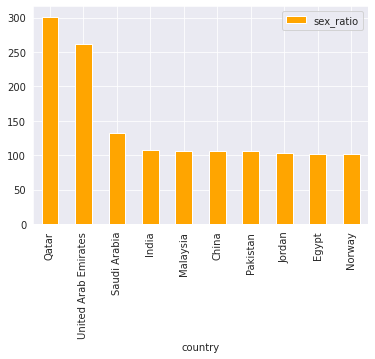

In [ ]:
sex_ratio = df.sort_values('sex_ratio',ascending=False).head(10)
sex = sex_ratio[['country','sex_ratio']]
sex.plot.bar(x='country', y='sex_ratio',color='orange')
plt.savefig('sex_ratio.png', bbox_inches='tight')


In [ ]:
stats.pearsonr(df['safety_index'], df['human_capital_index'])

(0.560410330561186, 1.4675784620178937e-06)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

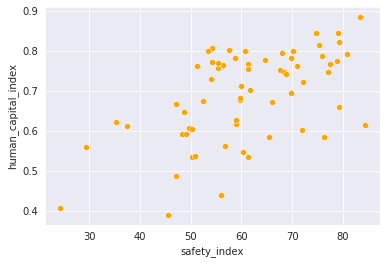

In [ ]:
sns.scatterplot(x="safety_index", y="human_capital_index", data=df,color='orange')
plt.savefig('safety_hci_scat.png')
files.download('safety_hci_scat.png')

In [ ]:
stats.pearsonr(df['exports'], df['human_capital_index'])

(0.2648132918216028, 0.03445859830799198)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

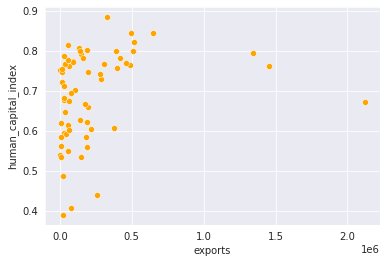

In [ ]:
sns.scatterplot(x="exports", y="human_capital_index", data=df,color='orange')
plt.savefig('exports.png')
files.download('exports.png')